# Beams - catenaries

This notebook shows how to use Beam elements model a catenary.

For more info on beams see "Beams - structural beams".

This may sound strange, but a wire is just a beam without bending and torsion stiffness.

Also, to avoid the beam from coiling up, we can set the tension_only parameter to True.

In [5]:
from DAVE import *
from DAVE.jupyter import *
s = Scene();

In [6]:
left = s.new_axis("left", position = (0,0,10))
right = s.new_axis("right", position = (10,0,10))
cable = s.new_beam("cable", nodeA=left, nodeB = right,
                        EA = 10000,
                        EIy = 0, EIz = 0, GIp = 0,
                        L=20,
                        mass = 10,
                        tension_only = True,
                        n_segments=17)

s.solve_statics()

Solved to 1.0978910167658285e-06.


c:\python\miniconda3\envs\book\lib\site-packages\DAVE\scene.py:6245: UserWarning: new_frame is deprecated, use new_frame instead
  warnings.warn('new_frame is deprecated, use new_frame instead')


True

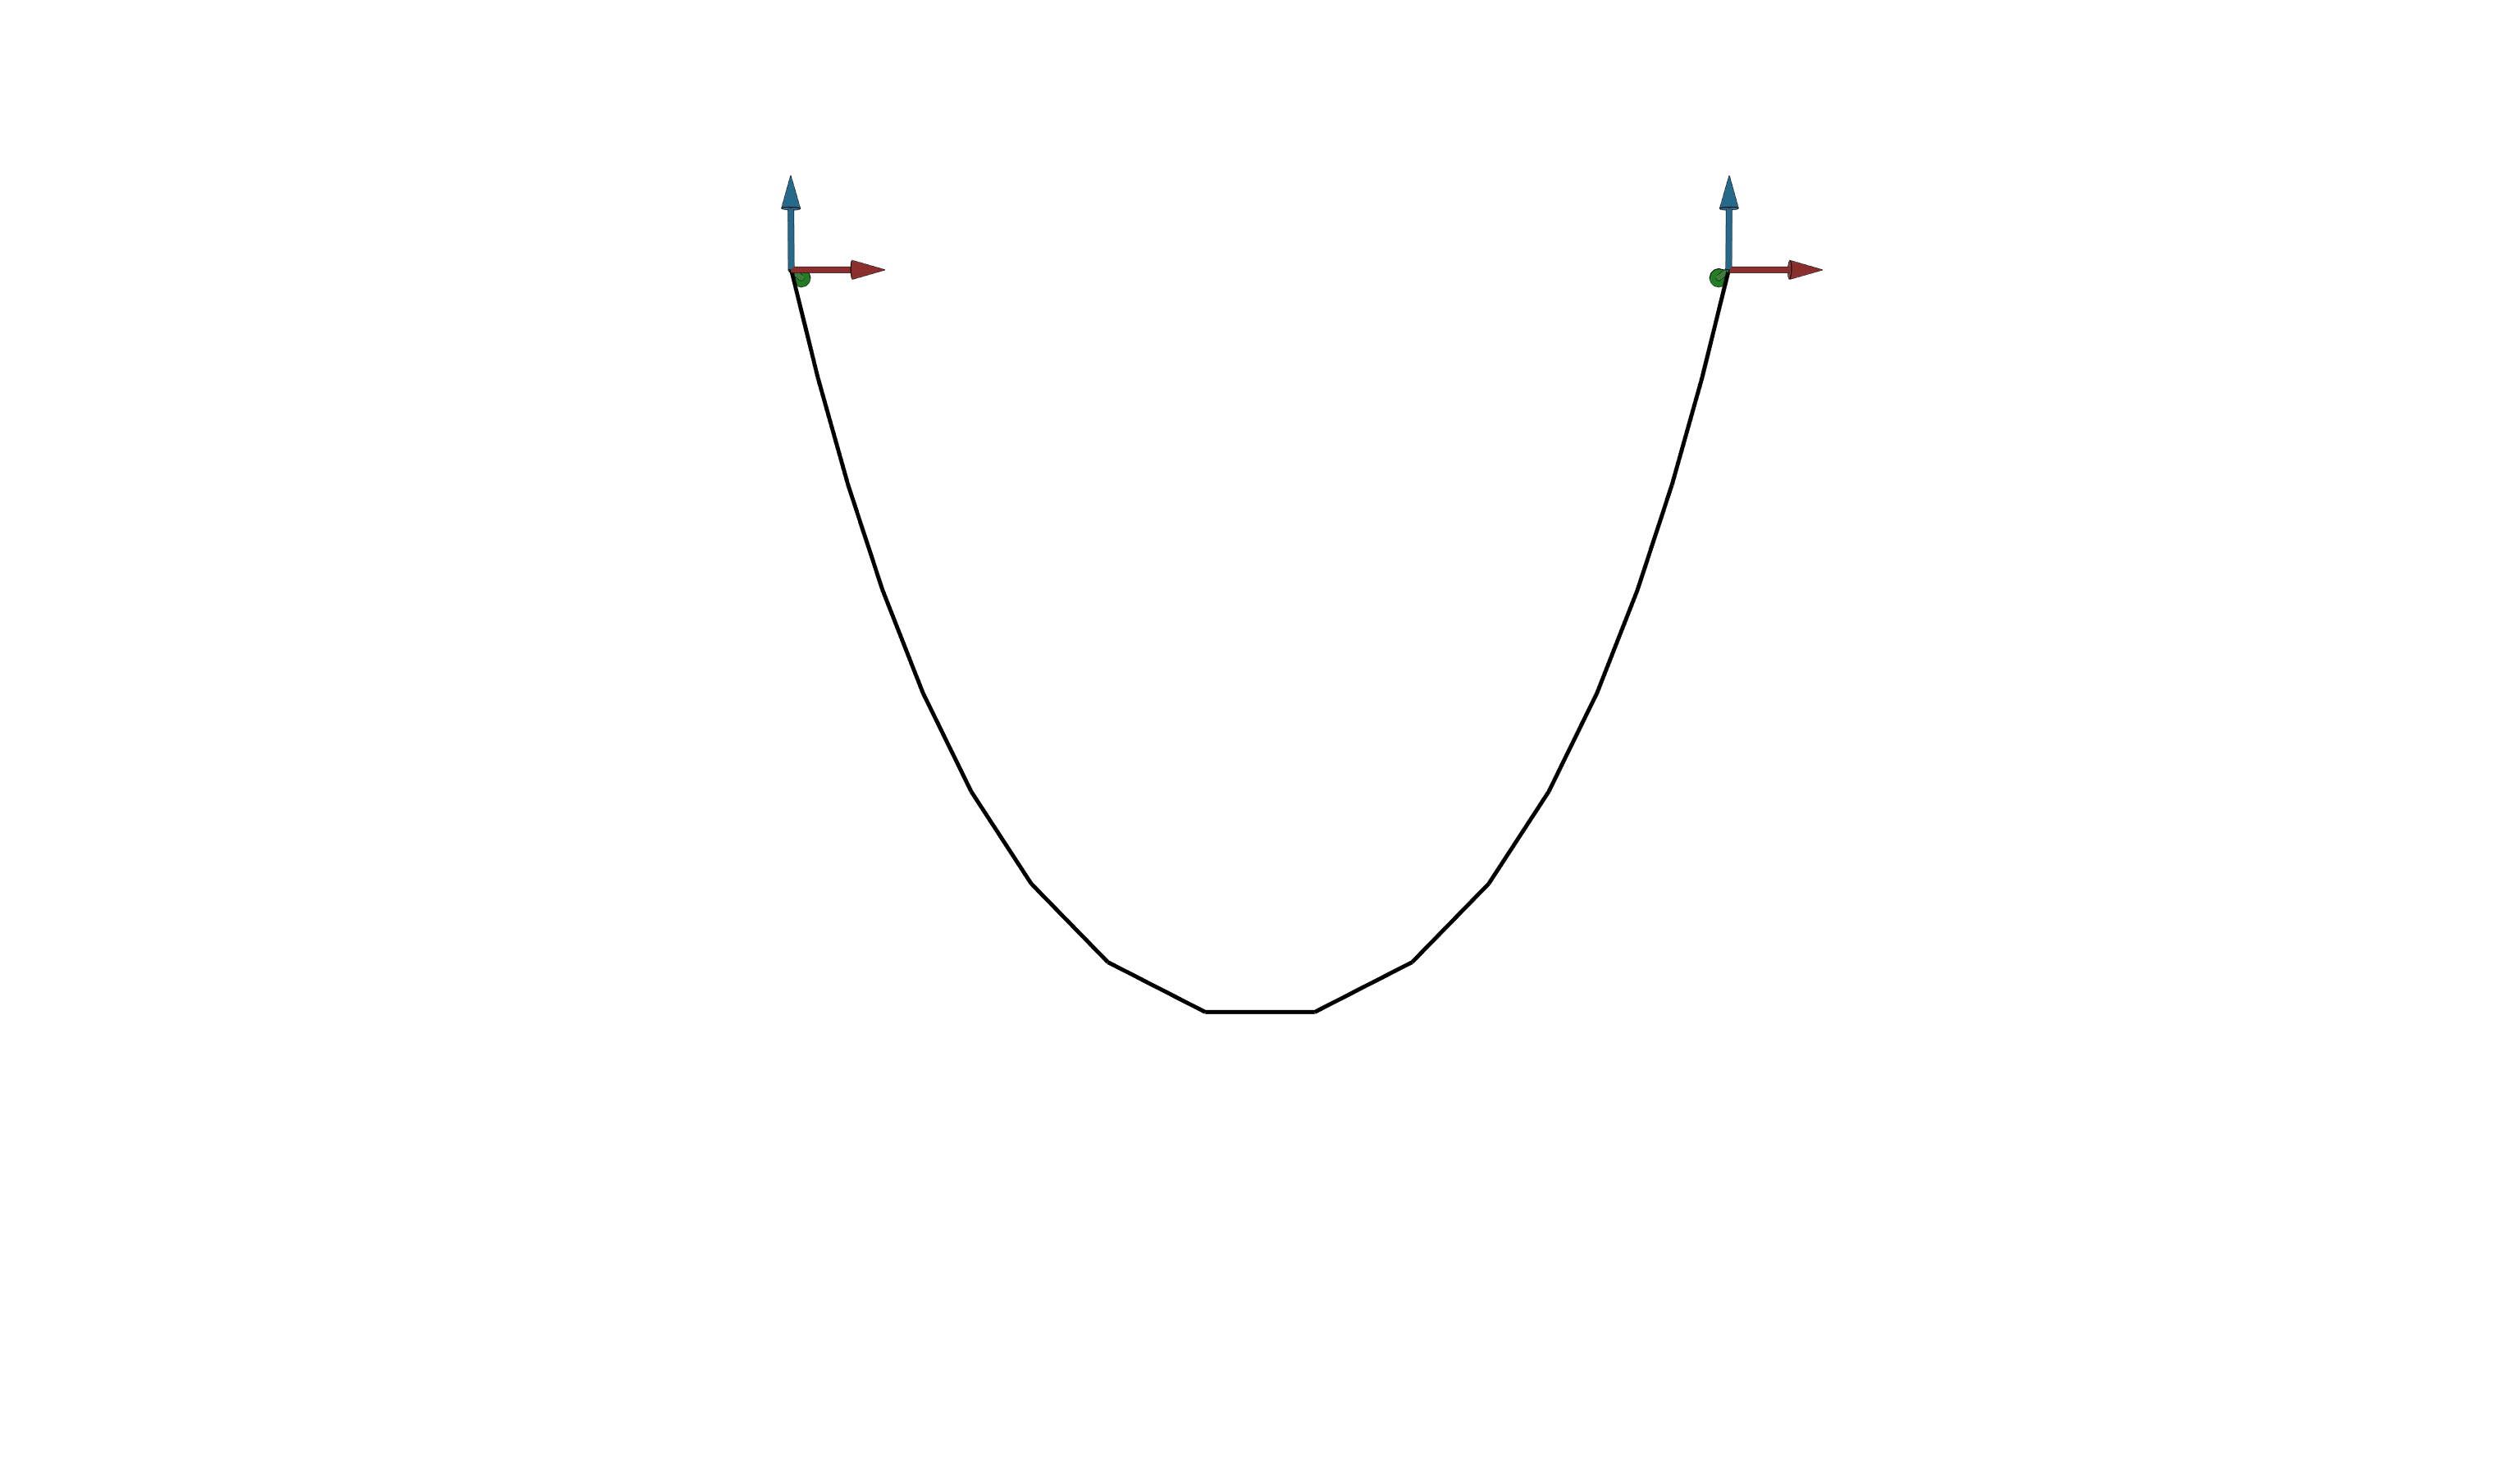

In [7]:
show(s, camera_pos=(5,-30,6), lookat = (5,0,5))

The vertical force on both ends of the cable should be half the weight

In [8]:
0.5 * 9.81 * cable.mass

49.050000000000004

In [9]:
right.applied_force[2]

-49.033250104861764

well, seems right

Lets see the influence of the number of segments of the cable.

We could "manually" change that, but we can also use the "plot_effect" function from scene for that:

setting 1.0 results in -49.033249999999995
setting 2.0 results in -49.03325000029082
setting 3.0 results in -49.033250001940324
setting 4.0 results in -49.03335093777311
setting 5.0 results in -49.03325167874284
setting 6.0 results in -49.03325262721562
setting 7.0 results in -49.03325408069765
setting 8.0 results in -49.03324956481818
setting 9.0 results in -49.03325000844269
setting 10.0 results in -49.03324520319524
setting 11.0 results in -49.033249938823595
setting 12.0 results in -49.03324869512904
setting 13.0 results in -49.03324998463358
setting 14.0 results in -49.03324999940194
setting 15.0 results in -49.03324842358916
setting 16.0 results in -49.0332487705477
setting 17.0 results in -49.033250104861764
setting 18.0 results in -49.033250049596546
setting 19.0 results in -49.03328190732311
setting 20.0 results in -49.03325008987641
setting 21.0 results in -49.033249805315045
setting 22.0 results in -49.03325001068483
setting 23.0 results in -49.033249999580136
setting 24.0 r

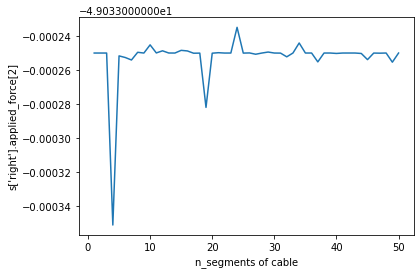

In [10]:
s.plot_effect(evaluate="s['right'].applied_force[2]",
   change_property="n_segments",
    change_node="cable",
    start=1,
    to=50.0,
    steps=50);

Same for horizontal force

setting 1.0 results in -49.033249999999995
setting 2.0 results in -49.03325000029082
setting 3.0 results in -49.033250001940324
setting 4.0 results in -49.03335093777311
setting 5.0 results in -49.03325167874284
setting 6.0 results in -49.03325262721562
setting 7.0 results in -49.03325408069765
setting 8.0 results in -49.03324956481818
setting 9.0 results in -49.03325000844269
setting 10.0 results in -49.03324520319524
setting 11.0 results in -49.033249938823595
setting 12.0 results in -49.03324869512904
setting 13.0 results in -49.03324998463358
setting 14.0 results in -49.03324999940194
setting 15.0 results in -49.03324842358916
setting 16.0 results in -49.0332487705477
setting 17.0 results in -49.033250104861764
setting 18.0 results in -49.033250049596546
setting 19.0 results in -49.03328190732311
setting 20.0 results in -49.03325008987641


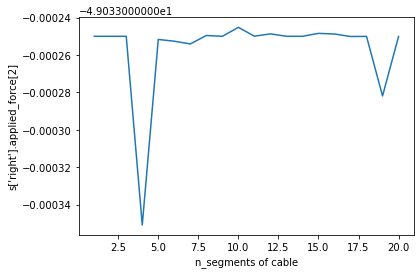

In [11]:
s.plot_effect(evaluate="s['right'].applied_force[2]",
   change_property="n_segments",
    change_node="cable",
    start=1,
    to=20.0,
    steps=20);